In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [3]:
x_train = sequence.pad_sequences(x_train, maxlen=400)
x_test = sequence.pad_sequences(x_test, maxlen=400)

In [4]:
model = Sequential()
model.add(Embedding(20000, 128, input_length=400))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train,
         batch_size=32,
         epochs=2,
         validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 334s 13ms/step - loss: 0.3825 - acc: 0.8192 - val_loss: 0.3555 - val_acc: 0.8496
Epoch 2/2
25000/25000 [==============================] - 349s 14ms/step - loss: 0.0772 - acc: 0.9730 - val_loss: 0.5224 - val_acc: 0.8358


In [7]:
print("Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 21s 826us/step
Accuracy : 0.8358


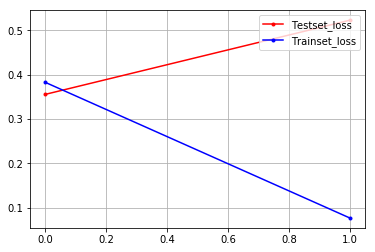

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

import numpy as np
import matplotlib.pyplot as plt
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', 
        c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', 
        c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.show()